# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [3]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [4]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    f = (x**2)*numpy.sin(x)
    return f;

Ensure your function works with numpy arrays:

In [5]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [6]:
def g(x):
    '''Analytical integral of f(x).'''
    g = 2*x*numpy.sin(x) + (2-x**2)*numpy.cos(x) - 2
    return g;

Check your solution with the same numpy array:

In [7]:
assert g(0) == 0.

In [8]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [9]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    y = g(xmax)-g(xmin)
    return y;

Check your analytic function:

In [10]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [11]:
def integrate_numeric(xmin, xmax, N):
    dx = (xmax - xmin)/N
    x1 = xmin
    x2 = xmin + dx/2
    x3 = xmin + dx
    y = 0
    for i in range (0,N):
        y = f(x1) + (4*f(x2)) + f(x3) + y
        x1 = x1 + dx
        x2 = x2 + dx
        x3 = x3 + dx
    v = dx/6 * y
    return v;
integrate_numeric(0, 4, 100)

1.0965907462493851

Make sure you have implemented Simpson's rule correctly:

In [12]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [13]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


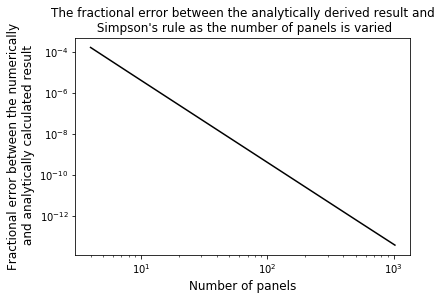

In [23]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
#my code
N1 = integrate_numeric(x0, x1, 4)
N2 = integrate_numeric(x0, x1, 8)
N3 = integrate_numeric(x0, x1, 16)
N4 = integrate_numeric(x0, x1, 32)
N5 = integrate_numeric(x0, x1, 64)
N6 = integrate_numeric(x0, x1, 128)
N7 = integrate_numeric(x0, x1, 256)
N8 = integrate_numeric(x0, x1, 512)
N9 = integrate_numeric(x0, x1, 1024)
result_numeric = [N1, N2, N3, N4, N5, N6, N7, N8, N9]
difference = result_analytic - result_numeric
fractional_difference = difference/result_analytic
plt.xscale('log')
plt.yscale('log')
plt.plot(panel_counts, fractional_difference, '-', color='black')
plt.xlabel('Number of panels',fontsize=12)
plt.ylabel('Fractional error between the numerically\n and analytically calculated result',fontsize=12)
plt.title('The fractional error between the analytically derived result and\n Simpson\'s rule as the number of panels is varied')
plt.show()

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing the number of panels, N, in general causes the accuracy to increase for the numerical method. For Simpson's rule, the error scales with $N^-$$^4$. If the number of panels taken is too large, then the accuracy of the the numerical method decreases, as the errors due to numerical precision occur.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

With the trapezium rule, as the number of panels increases, the accuracy also increases, however to not as great an accuracy of Simpson's rule, as the error scales with $N^-$$^2$, not $N^-$$^4$ as in Simpson's rule. However, at very large N, as with Simpson's rule, the accuracy of the trapezium rule decreases due to errors caused by numerical precision.